Find the most highly categorised data in the dataset

In [12]:
import sys
!{sys.executable} -m pip install torch torchvision scipy matplotlib | grep -v 'already satisfied'

In [13]:
from scipy.io import loadmat
import numpy as np
import pathlib

# nasty import hack - this is a code smell, work out how to remove it
import sys
sys.path.append('../')

In [14]:
# def load_mf_softmax():
#     basepath = pathlib.Path("/Volumes/Data/mf_alexnet_softmax")

#     paths = basepath.glob("*.mat")
#     paths = sorted(paths, key=lambda p: int(p.stem))
#     encodings = [loadmat(p)["features"] for p in paths]
#     encodings = np.concatenate(encodings)
#     return encodings

In [15]:
# Download ImageNet labels

! if [ -f "imagenet_classes.txt" ]; then echo "File imagenet_classes.txt already exists"; else wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt 2> /dev/null; fi


File imagenet_classes.txt already exists


In [16]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [17]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_resnet50")) # load resnet 50 encodings

In [18]:
from simcoder.count_cats import findHighlyCategorisedInDataset
from simcoder.count_cats import countNumberinCatGTThresh

threshold = 0.95

top_cats, counts  = findHighlyCategorisedInDataset(smData,threshold)


In [19]:

for i in range(100):
    print( top_cats[i], counts[i], categories[top_cats[i]], countNumberinCatGTThresh(top_cats[i],threshold,smData) )

985 1787 daisy 1787
425 951 barn 951
562 909 fountain 909
309 897 bee 897
483 844 castle 844
984 785 rapeseed 785
759 757 reflex camera 757
291 518 lion 518
97 499 drake 499
916 479 web site 479
970 475 alp 475
565 462 freight car 462
919 458 street sign 458
980 411 volcano 411
917 410 comic book 410
643 400 mask 400
437 398 beacon 398
333 396 hamster 396
308 393 fly 393
989 387 hip 387
284 379 Siamese cat 379
506 378 coil 378
489 377 chainlink fence 377
319 372 dragonfly 372
107 371 jellyfish 371
99 362 goose 362
879 357 umbrella 357
971 342 bubble 342
335 328 fox squirrel 328
283 328 Persian cat 328
884 323 vault 323
703 321 park bench 321
888 317 viaduct 317
417 314 balloon 314
820 299 steam locomotive 299
979 292 valley 292
497 288 church 288
611 282 jigsaw puzzle 282
340 280 zebra 280
388 279 giant panda 279
819 276 stage 276
94 272 hummingbird 272
815 271 spider web 271
470 271 candle 271
84 270 peacock 270
908 266 wing 266
525 260 dam 260
850 259 teddy 259
649 251 megalith 251
1

In [25]:
from simcoder.count_cats import findCatsWithCountMoreThanLessThan

threshold = 0.90

range_catsx,counts = findCatsWithCountMoreThanLessThan(100,184,smData,threshold)

print( f"found {range_catsx.size} results")
for i in range(range_catsx.size):
    print( range_catsx[i], counts[i], categories[range_catsx[i]], countNumberinCatGTThresh(range_catsx[i],threshold,smData) )

found 100 results
9 124 ostrich 124
12 143 house finch 143
15 110 robin 110
31 106 tree frog 106
131 109 little blue heron 109
145 125 king penguin 125
146 147 albatross 147
148 121 killer whale 121
150 122 sea lion 122
151 134 Chihuahua 134
207 124 golden retriever 124
292 144 tiger 144
310 132 ant 132
315 142 mantis 142
320 120 damselfly 120
324 144 cabbage butterfly 144
327 102 starfish 102
348 133 ram 133
354 136 Arabian camel 136
366 136 gorilla 136
401 137 accordion 137
402 154 acoustic guitar 154
406 122 altar 122
424 135 barbershop 135
433 101 bathing cap 101
441 157 beer glass 157
442 111 bell cote 111
447 105 binoculars 105
448 109 birdhouse 109
452 165 bonnet 165
455 165 bottlecap 165
457 120 bow tie 120
460 132 breakwater 132
466 114 bullet train 114
475 174 car mirror 174
476 159 carousel 159
488 119 chain 119
510 103 container ship 103
515 113 cowboy hat 113
536 183 dock 183
546 138 electric guitar 138
555 150 fire engine 150
568 159 fur coat 159
603 162 horse cart 162
60

In [21]:
from simcoder.experiment import get_nth_categorical_query

top_caters = top_cats[0: 100]  # subset the top categories
print( categories[top_caters[0]] )
queries = get_nth_categorical_query(top_caters,smData,0)  # get one query in each category

from simcoder.similarity import get_mf_image

daisy


web site


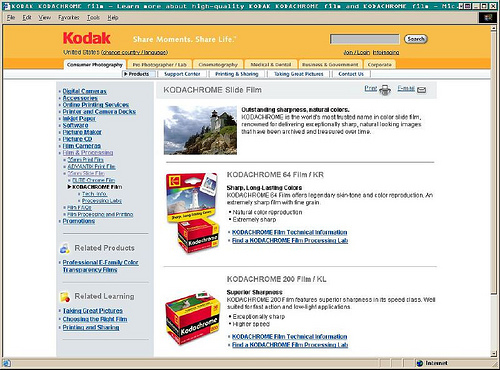

In [22]:
from simcoder.count_cats import get_topcat


q = queries[9]
found_cat = get_topcat(q,smData)
print( categories[found_cat] )
get_mf_image(q)